In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./CSV/risk_factors_cervical_cancer.csv")
print(data)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
data[data=='?'].count()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [7]:
data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [8]:
data[data=='?'].count()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [9]:
numerical = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)', 
             'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']

In [10]:
data = data.replace('?', np.NaN)

In [11]:
for num in numerical:
    print(num,'',data[num].astype(str).astype(float).mean())
    feature_mean = round(data[num].astype(str).astype(float).mean(),1)
    data[num] = data[ num].fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


In [12]:
for num in numerical:
    data[numerical] = data[numerical].astype(float)

In [13]:
data.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                             0
STDs                                  105
STDs (number)                           0
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [14]:
categorical = ['Smokes', 'Hormonal Contraceptives', 'IUD','STDs', 'STDs:condylomatosis', 
               'STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis',
              'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
              'STDs:Hepatitis B', 'STDs:HPV']

In [15]:
data[categorical]=data[categorical].fillna(data.mode().iloc[0])

In [16]:
data.head(10)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34.0,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52.0,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46.0,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42.0,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51.0,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26.0,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45.0,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44.0,3.0,15.0,2.3,1.0,1.266973,2.8,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [17]:
data.drop(['STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Schiller','Citology','Biopsy','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:HPV','STDs:Hepatitis B','STDs:HIV','STDs:AIDS','STDs:molluscum contagiosum','STDs:genital herpes','STDs:vaginal condylomatosis','STDs:cervical condylomatosis','STDs:condylomatosis','STDs','STDs (number)'],inplace=True,axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              858 non-null    float64
 1   Number of sexual partners        858 non-null    float64
 2   First sexual intercourse         858 non-null    float64
 3   Num of pregnancies               858 non-null    float64
 4   Smokes                           858 non-null    object 
 5   Smokes (years)                   858 non-null    float64
 6   Smokes (packs/year)              858 non-null    float64
 7   Hormonal Contraceptives          858 non-null    object 
 8   Hormonal Contraceptives (years)  858 non-null    float64
 9   IUD                              858 non-null    object 
 10  IUD (years)                      858 non-null    float64
 11  Hinselmann                       858 non-null    int64  
dtypes: float64(8), int64(1

In [19]:
data.isna().sum()

Age                                0
Number of sexual partners          0
First sexual intercourse           0
Num of pregnancies                 0
Smokes                             0
Smokes (years)                     0
Smokes (packs/year)                0
Hormonal Contraceptives            0
Hormonal Contraceptives (years)    0
IUD                                0
IUD (years)                        0
Hinselmann                         0
dtype: int64

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              832 non-null    float64
 1   Number of sexual partners        832 non-null    float64
 2   First sexual intercourse         832 non-null    float64
 3   Num of pregnancies               832 non-null    float64
 4   Smokes                           832 non-null    object 
 5   Smokes (years)                   832 non-null    float64
 6   Smokes (packs/year)              832 non-null    float64
 7   Hormonal Contraceptives          832 non-null    object 
 8   Hormonal Contraceptives (years)  832 non-null    float64
 9   IUD                              832 non-null    object 
 10  IUD (years)                      832 non-null    float64
 11  Hinselmann                       832 non-null    int64  
dtypes: float64(8), int64(1), ob

In [22]:
# for num in numerical:
#     data[numerical] = data[numerical].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 857
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              832 non-null    float64
 1   Number of sexual partners        832 non-null    float64
 2   First sexual intercourse         832 non-null    float64
 3   Num of pregnancies               832 non-null    float64
 4   Smokes                           832 non-null    object 
 5   Smokes (years)                   832 non-null    float64
 6   Smokes (packs/year)              832 non-null    float64
 7   Hormonal Contraceptives          832 non-null    object 
 8   Hormonal Contraceptives (years)  832 non-null    float64
 9   IUD                              832 non-null    object 
 10  IUD (years)                      832 non-null    float64
 11  Hinselmann                       832 non-null    int64  
dtypes: float64(8), int64(1), ob

In [24]:
data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),Hinselmann
Age,1.000000,0.068587,0.359504,0.515124,0.046663,0.212968,0.127665,-0.001901,0.266135,0.275544,0.203180,-0.009936
Number of sexual partners,0.068587,1.000000,-0.156209,0.065367,0.231429,0.173998,0.173627,-0.011907,0.009520,0.024421,0.000313,-0.043021
First sexual intercourse,0.359504,-0.156209,1.000000,-0.071980,-0.129407,-0.062396,-0.059232,-0.027341,-0.000229,-0.014569,-0.027686,-0.019041
Num of pregnancies,0.515124,0.065367,-0.071980,1.000000,0.074366,0.170310,0.093547,0.100585,0.198205,0.200442,0.140202,0.034653
Smokes,0.046663,0.231429,-0.129407,0.074366,1.000000,0.721288,0.491576,-0.005492,0.039741,-0.059554,-0.037003,0.030798
Smokes (years),0.212968,0.173998,-0.062396,0.170310,0.721288,1.000000,0.723681,-0.022051,0.044949,0.025380,0.035829,0.069425
Smokes (packs/year),0.127665,0.173627,-0.059232,0.093547,0.491576,0.723681,1.000000,-0.003615,0.037342,0.006806,0.014520,0.025430
Hormonal Contraceptives,-0.001901,-0.011907,-0.027341,0.100585,-0.005492,-0.022051,-0.003615,1.000000,0.428622,-0.007511,-0.042732,0.007831
Hormonal Contraceptives (years),0.266135,0.009520,-0.000229,0.198205,0.039741,0.044949,0.037342,0.428622,1.000000,0.087128,-0.003594,0.035836
IUD,0.275544,0.024421,-0.014569,0.200442,-0.059554,0.025380,0.006806,-0.007511,0.087128,1.000000,0.740130,0.050116


In [25]:
X = data.drop(['Hinselmann'], axis=1)
y = data['Hinselmann']


In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=44)
print(x_train.shape, x_test.shape)

(665, 11) (167, 11)


In [27]:
from sklearn.linear_model import LogisticRegression
classify_model = LogisticRegression(max_iter=500)
print(classify_model.fit(x_train, y_train))

preds = classify_model.predict(x_test)
print(preds)

LogisticRegression(max_iter=500)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
print(confusion_matrix(y_test, preds))

[[159   0]
 [  8   0]]


In [29]:
print(accuracy_score(y_test, preds))

0.9520958083832335


In [30]:
sns.set(rc={'figure.figsize':(10,10)})

<Axes: >

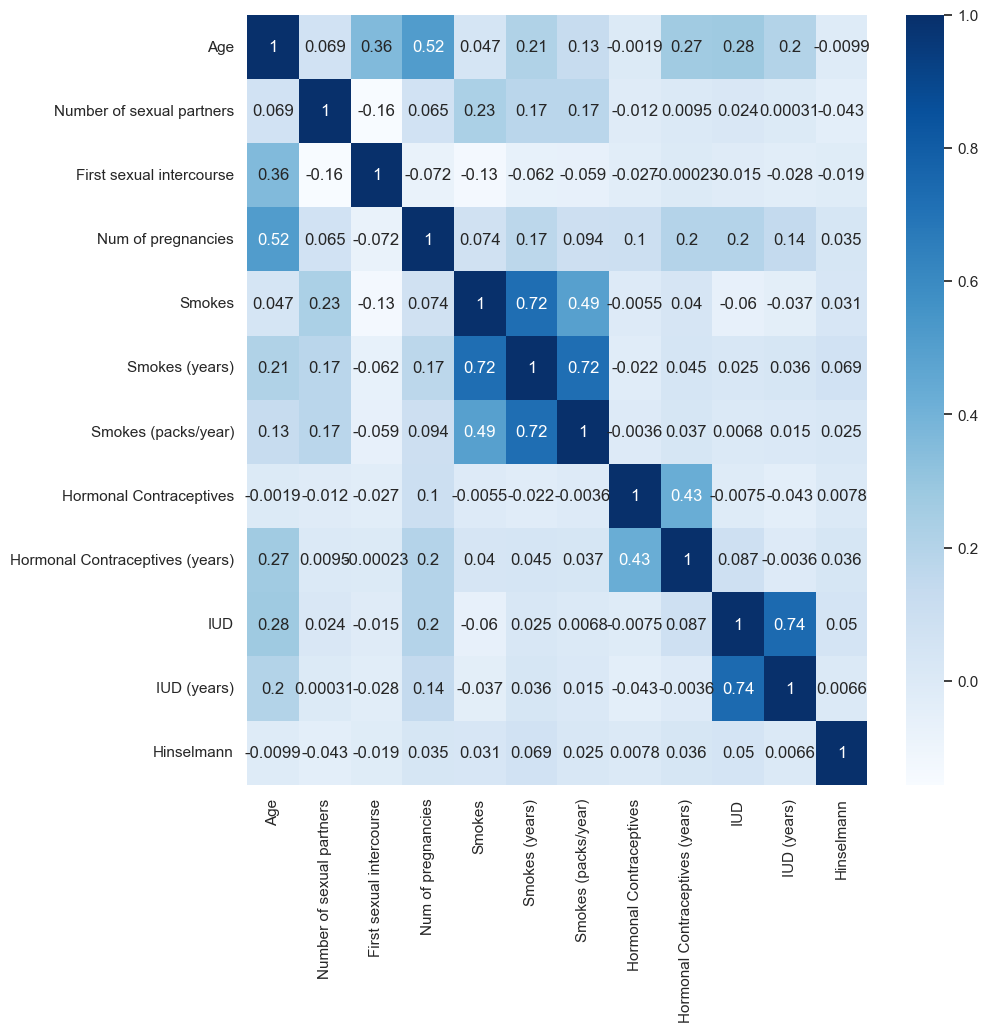

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')


In [32]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Hinselmann
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,27.058894,2.553486,17.026442,2.307452,1.257530,0.468037,2.310859,0.525805,0.042067
std,8.478054,1.653269,2.808235,1.407131,4.115052,2.242485,3.555875,1.831762,0.200863
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,1.000000


In [33]:
data


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),Hinselmann
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_classifier.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [35]:
preds_dt = dt_classifier.predict(x_test)
print(preds_dt)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


In [36]:
print(confusion_matrix(y_test, preds_dt))

[[152   7]
 [  7   1]]


In [37]:
print(accuracy_score(y_test, preds_dt))

0.9161676646706587


* when random state=42
lr=0.96
dt=0.91 (lr prediction is better)

* when random state=55
lr=0.95
dt=0.88 (lr prediction is better)

In [38]:
# regression = LogisticRegression(C=1, penalty='l2', solver='liblinear')
# regression.fit(x_train, y_train)
# regression.score(x_test, y_test)
# print(classification_report(y_test, regression.predict(x_test)))